# Task 5

## Done by Arina Shinkorenok, group j4132c

**Description:**

Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Fill all the necessary gaps in CNN_and_Transfer_Learning.ipynb and fit neural networks for solving the binary classification task.

Part 1:

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

Part 2:

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with one more avaliable pre-trained deep learning model from keras application, for example Xception - https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

Part 3:

Train the DL model with the highest possible accuracy on test data. You may experiment with any architecture and / or ensemble of models on your own choice (not limited to keras.io/api/applications).
The student, whose model will have the highest score, will get “5A” mark for the MLT Exam automatically.


## Convolutional Neural Network

# Part 1

1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from keras.applications import VGG16
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# from tensorflow.keras.layers.experimental import preprocessing

import warnings
warnings.simplefilter('ignore')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Initialize the folders with train, test and validation datasets (in "/My Drive/..." or from your local repository where you have downloaded data):

train = '/content/drive/train'
val =   '/content/drive/val'
test =  '/content/drive/test'

# The shape of the RGB image
img_width, img_height, channels = 150, 150, 3 # i used this shape for part 1 and 2
# img_width, img_height, channels = 224, 224, 3 # i used this shape for part 3

# input shape
input_shape = (img_width, img_height, 3)
# position matters!
# Number_of_channels can be at the first or the last position
# in our case - "channels last"

# minibatch size
batch_size = 64
# train set size
nb_train_samples = 20002
# validation set size
nb_validation_samples = 2492
# test set size
nb_test_samples = 2502

### Prepare the data.


In [ ]:
datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = datagen.flow_from_directory(
    train,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

val_generator = datagen.flow_from_directory(
    val,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

test_generator = datagen.flow_from_directory(
    test,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

Add to the model all the missing layers, by analogy with the already specified.
Keras documentation: https://keras.io/layers/about-keras-layers/

In [ ]:
model = Sequential()

# 1: +Convolutional
# For example:
model.add(Conv2D(16, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
# 2: +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 3:
model.add(Conv2D(32, (3, 3)))
#     +Relu
model.add(Activation('relu'))
# 4:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 5:  +Convolutional
model.add(Conv2D(64, (3, 3)))
#     +Relu
model.add(Activation('relu'))
# 6:  +Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 7:  +Flattening
model.add(Flatten())
# 8:  +Dense
model.add(Dense(64))
#     +ReLu
model.add(Activation('relu'))
# 9:  +Dropout
model.add(Dropout(0.5))
# 10: +Dense
model.add(Dense(1))
#     +Sigmoid
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Number of epochs: 10

In [ ]:
# use the generator to train the model (analogue of the fit method)
# 1 epoch of training on a CPU will take 4-6 minutes. The GPU is an ~order of magnitude faster.
# THE FIRST EPOCH USUALLY TAKES MUCH LARGER TIME AS KERAS SHOULD BUILD THE COMPUTATIONAL GRAPH

Model_3Conv_10 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=10, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/10
312/312 [==============================] - 36s 103ms/step - loss: 0.6093 - accuracy: 0.6619 - val_loss: 0.5173 - val_accuracy: 0.7451
Epoch 2/10
312/312 [==============================] - 22s 69ms/step - loss: 0.5010 - accuracy: 0.7587 - val_loss: 0.4539 - val_accuracy: 0.7862
Epoch 3/10
312/312 [==============================] - 22s 70ms/step - loss: 0.4340 - accuracy: 0.8002 - val_loss: 0.4344 - val_accuracy: 0.8010
Epoch 4/10
312/312 [==============================] - 21s 69ms/step - loss: 0.3792 - accuracy: 0.8306 - val_loss: 0.4363 - val_accuracy: 0.8088
Epoch 5/10
312/312 [==============================] - 22s 70ms/step - loss: 0.3347 - accuracy: 0.8528 - val_loss: 0.4190 - val_accuracy: 0.8203
Epoch 6/10
312/312 [==============================] - 22s 70ms/step - loss: 0.2986 - accuracy: 0.8732 - val_loss: 0.3790 - val_accuracy: 0.8347
Epoch 7/10
312/312 [==============================] - 22s 70ms/step - loss: 0.2470 - accuracy: 0.8964 - val_loss: 0.4160 - val_accuracy

### Evaluate accuracy on test data (epochs: 10)

In [ ]:
# NOTE: if the accuracy on test data after 15 epochs is less than 80% smth goes wrong

scores_3Conv_10 = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores_3Conv_10[1]*100))

Accuracy on test data: 83.81%


### Number of epochs: 15

In [ ]:
Model_3Conv_15 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/15
312/312 [==============================] - 22s 71ms/step - loss: 0.1182 - accuracy: 0.9535 - val_loss: 0.5754 - val_accuracy: 0.8331
Epoch 2/15
312/312 [==============================] - 22s 70ms/step - loss: 0.1057 - accuracy: 0.9586 - val_loss: 0.6067 - val_accuracy: 0.8273
Epoch 3/15
312/312 [==============================] - 22s 70ms/step - loss: 0.0892 - accuracy: 0.9644 - val_loss: 0.6205 - val_accuracy: 0.8376
Epoch 4/15
312/312 [==============================] - 22s 71ms/step - loss: 0.0734 - accuracy: 0.9729 - val_loss: 0.7969 - val_accuracy: 0.8318
Epoch 5/15
312/312 [==============================] - 22s 72ms/step - loss: 0.0709 - accuracy: 0.9738 - val_loss: 0.8236 - val_accuracy: 0.8174
Epoch 6/15
312/312 [==============================] - 22s 72ms/step - loss: 0.0724 - accuracy: 0.9731 - val_loss: 0.7410 - val_accuracy: 0.8339
Epoch 7/15
312/312 [==============================] - 23s 73ms/step - loss: 0.0592 - accuracy: 0.9773 - val_loss: 0.8251 - val_accuracy:

### Evaluate accuracy on test data (epochs: 15)

In [ ]:
scores_3Conv_15 = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores_3Conv_15[1]*100))

Accuracy on test data: 84.42%


### Number of epochs: 20

In [ ]:
Model_3Conv_20 = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20, # try different number of epochs: 10, 15, 20; check the loss and accuracy;
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
312/312 [==============================] - 21s 69ms/step - loss: 0.0431 - accuracy: 0.9828 - val_loss: 0.9544 - val_accuracy: 0.8331
Epoch 2/20
312/312 [==============================] - 22s 71ms/step - loss: 0.0456 - accuracy: 0.9810 - val_loss: 0.9276 - val_accuracy: 0.8466
Epoch 3/20
312/312 [==============================] - 22s 71ms/step - loss: 0.0457 - accuracy: 0.9830 - val_loss: 1.0248 - val_accuracy: 0.8376
Epoch 4/20
312/312 [==============================] - 22s 71ms/step - loss: 0.0420 - accuracy: 0.9852 - val_loss: 1.0726 - val_accuracy: 0.8376
Epoch 5/20
312/312 [==============================] - 22s 69ms/step - loss: 0.0416 - accuracy: 0.9856 - val_loss: 0.9415 - val_accuracy: 0.8417
Epoch 6/20
312/312 [==============================] - 22s 69ms/step - loss: 0.0358 - accuracy: 0.9863 - val_loss: 1.0518 - val_accuracy: 0.8363
Epoch 7/20
312/312 [==============================] - 21s 68ms/step - loss: 0.0385 - accuracy: 0.9848 - val_loss: 1.1106 - val_accuracy:

### Evaluate accuracy on test data (epochs: 20)

In [ ]:
scores_3Conv_20 = model.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores_3Conv_20[1]*100))

Accuracy on test data: 84.78%


### Plot the graphs:

- Loss(Number of epochs)

- Accuracy(Number of epochs)

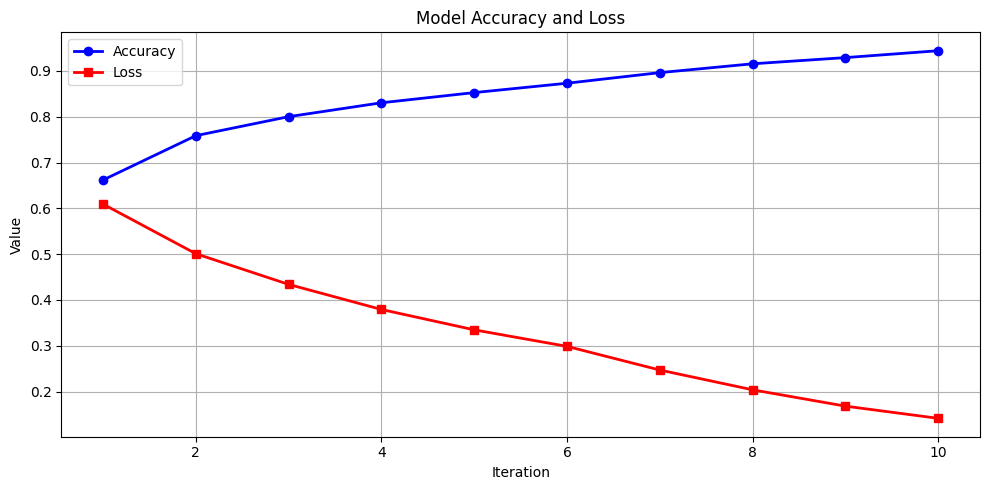

In [ ]:
#epochs=10
iterations = range(1, len(Model_3Conv_10.history['accuracy']) + 1)
accuracy = Model_3Conv_10.history['accuracy']
loss = Model_3Conv_10.history['loss']

plt.figure(figsize=(10, 5))
plt.plot(iterations, accuracy, 'b', label='Accuracy', linewidth=2, marker='o')
plt.plot(iterations, loss, 'r', label='Loss', linewidth=2, marker='s')
plt.title('Model Accuracy and Loss')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

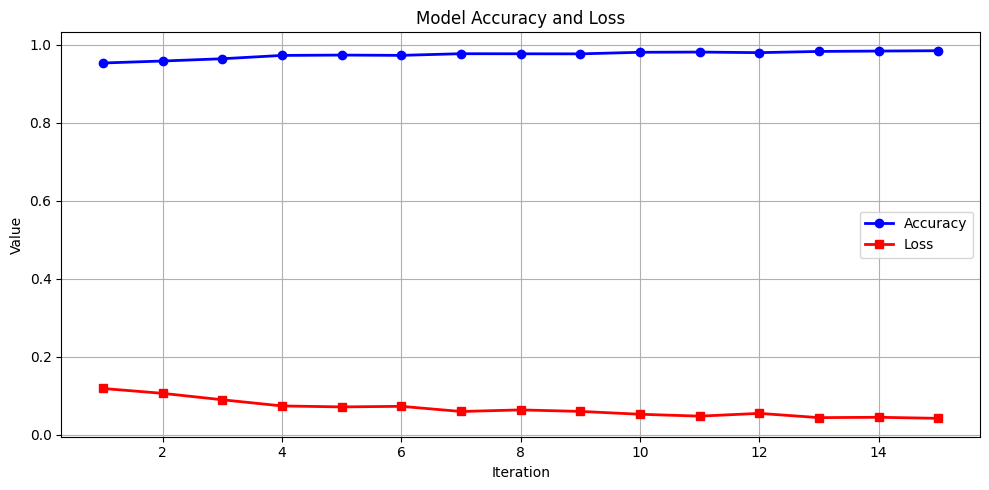

In [ ]:
#epochs=15
iterations = range(1, len(Model_3Conv_15.history['accuracy']) + 1)
accuracy = Model_3Conv_15.history['accuracy']
loss = Model_3Conv_15.history['loss']

plt.figure(figsize=(10, 5))
plt.plot(iterations, accuracy, 'b', label='Accuracy', linewidth=2, marker='o')
plt.plot(iterations, loss, 'r', label='Loss', linewidth=2, marker='s')
plt.title('Model Accuracy and Loss')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

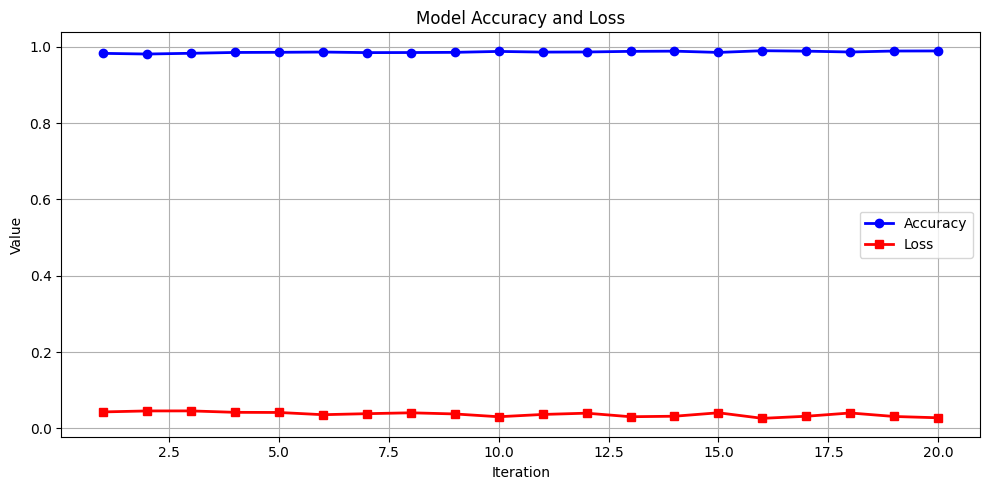

In [ ]:
#epochs=20
iterations = range(1, len(Model_3Conv_20.history['accuracy']) + 1)
accuracy = Model_3Conv_20.history['accuracy']
loss = Model_3Conv_20.history['loss']

plt.figure(figsize=(10, 5))
plt.plot(iterations, accuracy, 'b', label='Accuracy', linewidth=2, marker='o')
plt.plot(iterations, loss, 'r', label='Loss', linewidth=2, marker='s')
plt.title('Model Accuracy and Loss')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Part 2

1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with **another avaliable pre-trained deep learning model** from keras application https://keras.io/api/applications/.
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

## 1) Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.

In [ ]:
# First, download the weights of the VGG16 network trained on the ImageNet dataset:

vgg16_net = VGG16(weights='imagenet',
                  include_top=False,      # we take only the "convolution" part, the last layers we add ourselves
                  input_shape=(150, 150, 3))
vgg16_net.trainable = False               # clearly prescribe that we do NOT overload the network.
                                          # Weights VGG16 in the process of learning will remain unchanged!

vgg16_net.summary()                       # pay attention to the number of trained and untrained parameters

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

We construct our model of "transfer learning" by adding two fully connected layers to VGG16

In [ ]:
# add layers to VGG16:

model_vgg16 = Sequential()
model_vgg16.add(vgg16_net)

# + flattening
model_vgg16.add(Flatten())
# + Dense fullyconnected layer with 256 neurons
model_vgg16.add(Dense(256))
# + ReLu
model_vgg16.add(Activation('relu'))
# + Dropout
model_vgg16.add(Dropout(0.5))
# + Dense layer with 1 neuron
model_vgg16.add(Dense(1))
# + sigmoid
model_vgg16.add(Activation('sigmoid'))

model_vgg16.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
 activation_6 (Activation)   (None, 1)                

In [ ]:
model_vgg16.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-5),
              metrics=['accuracy'])

In [ ]:
# We also use the generator to train the model (similar to the fit method)
# Without using a GPU, learning 1 epoch of such a network will take about an hour. Plan your time =)
# If you have access to a GPU, you can try 10-12 epochs - the quality should increase even more.

Model_VVG = model_vgg16.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=12,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/12
312/312 [==============================] - 40s 97ms/step - loss: 0.5087 - accuracy: 0.7395 - val_loss: 0.3547 - val_accuracy: 0.8540
Epoch 2/12
312/312 [==============================] - 28s 89ms/step - loss: 0.3430 - accuracy: 0.8518 - val_loss: 0.2957 - val_accuracy: 0.8820
Epoch 3/12
312/312 [==============================] - 29s 92ms/step - loss: 0.2996 - accuracy: 0.8745 - val_loss: 0.2714 - val_accuracy: 0.8902
Epoch 4/12
312/312 [==============================] - 28s 88ms/step - loss: 0.2715 - accuracy: 0.8890 - val_loss: 0.2577 - val_accuracy: 0.8943
Epoch 5/12
312/312 [==============================] - 28s 88ms/step - loss: 0.2576 - accuracy: 0.8926 - val_loss: 0.2480 - val_accuracy: 0.9017
Epoch 6/12
312/312 [==============================] - 28s 89ms/step - loss: 0.2454 - accuracy: 0.8995 - val_loss: 0.2373 - val_accuracy: 0.9079
Epoch 7/12
312/312 [==============================] - 28s 89ms/step - loss: 0.2375 - accuracy: 0.9037 - val_loss: 0.2335 - val_accuracy:

### Evaluate accuracy on test data

In [ ]:
scores = model_vgg16.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data: %.2f%%" % (scores[1]*100))

Accuracy on test data: 90.30%


### Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

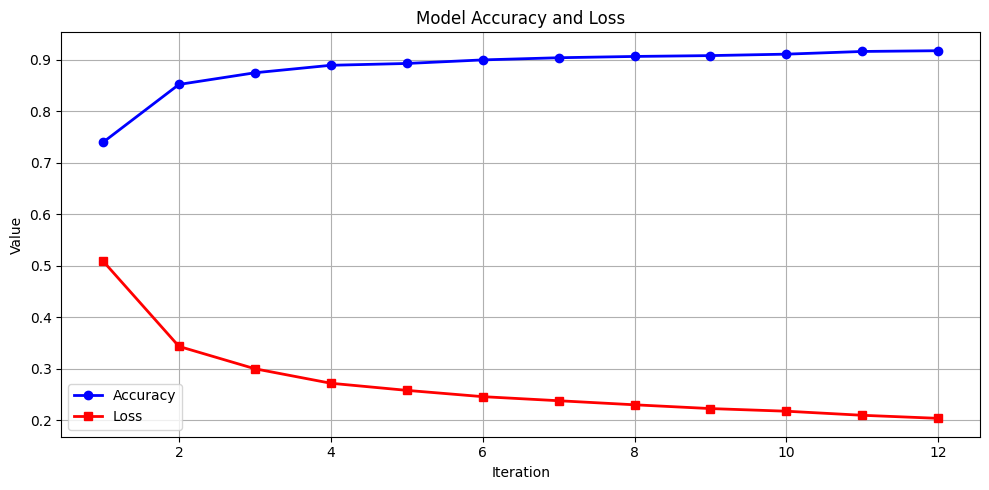

In [ ]:
iterations = range(1, len(Model_VVG.history['accuracy']) + 1)
accuracy = Model_VVG.history['accuracy']
loss = Model_VVG.history['loss']

plt.figure(figsize=(10, 5))
plt.plot(iterations, accuracy, 'b', label='Accuracy', linewidth=2, marker='o')
plt.plot(iterations, loss, 'r', label='Loss', linewidth=2, marker='s')
plt.title('Model Accuracy and Loss')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 2) Do the same with one more avaliable pre-trained deep learning model from keras application

*I decided to train two models ResNet50 and Xception for this part*

## ResNet50

In [ ]:
from keras.applications import ResNet50
from tensorflow.keras.layers import LeakyReLU

In [ ]:
resnet50_net = ResNet50(weights='imagenet',
                        include_top=False,
                        input_shape=(150, 150, 3))

resnet50_net.trainable = False

resnet50_net.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 156, 156, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 75, 75, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 75, 75, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
model_resnet50 = Sequential()
model_resnet50.add(resnet50_net)

model_resnet50.add(Flatten())
model_resnet50.add(Dense(256))
model_resnet50.add(Activation('relu'))
model_resnet50.add(Dropout(0.5))
model_resnet50.add(Dense(1))
model_resnet50.add(Activation('sigmoid'))

model_resnet50.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 5, 5, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               13107456  
                                                                 
 activation_7 (Activation)   (None, 256)               0         
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
 activation_8 (Activation)   (None, 1)                

In [ ]:
model_resnet50.compile(loss='binary_crossentropy',
                      optimizer=Adam(learning_rate=1e-5),
                      metrics=['accuracy'])

In [ ]:
Model_ResNet50 = model_resnet50.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
312/312 [==============================] - 32s 90ms/step - loss: 0.6850 - accuracy: 0.5675 - val_loss: 0.6609 - val_accuracy: 0.5983
Epoch 2/20
312/312 [==============================] - 31s 99ms/step - loss: 0.6515 - accuracy: 0.6183 - val_loss: 0.6361 - val_accuracy: 0.6509
Epoch 3/20
312/312 [==============================] - 26s 85ms/step - loss: 0.6368 - accuracy: 0.6418 - val_loss: 0.6256 - val_accuracy: 0.6624
Epoch 4/20
312/312 [==============================] - 27s 85ms/step - loss: 0.6279 - accuracy: 0.6477 - val_loss: 0.6189 - val_accuracy: 0.6669
Epoch 5/20
312/312 [==============================] - 27s 85ms/step - loss: 0.6179 - accuracy: 0.6638 - val_loss: 0.6079 - val_accuracy: 0.6793
Epoch 6/20
312/312 [==============================] - 27s 86ms/step - loss: 0.6117 - accuracy: 0.6671 - val_loss: 0.6042 - val_accuracy: 0.6842
Epoch 7/20
312/312 [==============================] - 27s 85ms/step - loss: 0.6057 - accuracy: 0.6760 - val_loss: 0.6021 - val_accuracy:

### Evaluate accuracy on test data

In [ ]:
scores_resnet50 = model_resnet50.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data (ResNet50): %.2f%%" % (scores_resnet50[1] * 100))

Accuracy on test data (ResNet50): 71.39%


### Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

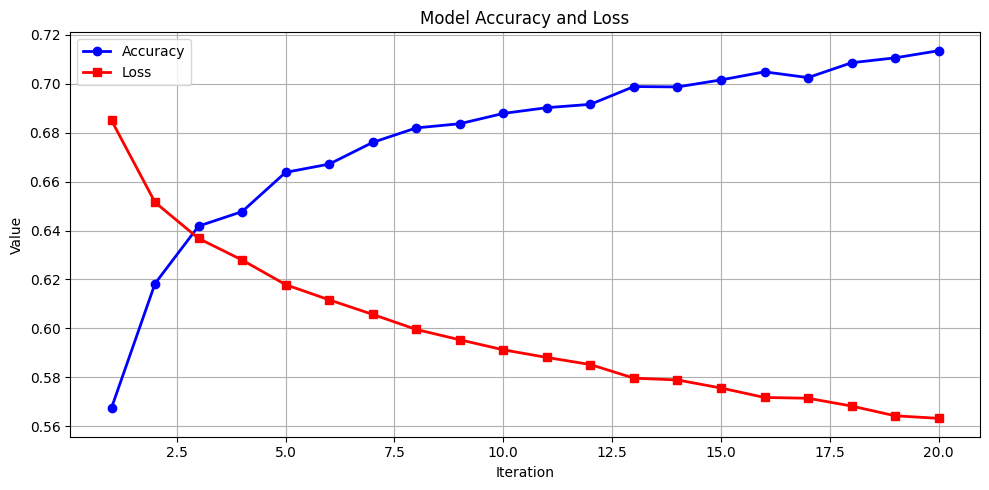

In [ ]:
iterations = range(1, len(Model_ResNet50.history['accuracy']) + 1)
accuracy = Model_ResNet50.history['accuracy']
loss = Model_ResNet50.history['loss']

plt.figure(figsize=(10, 5))
plt.plot(iterations, accuracy, 'b', label='Accuracy', linewidth=2, marker='o')
plt.plot(iterations, loss, 'r', label='Loss', linewidth=2, marker='s')
plt.title('Model Accuracy and Loss')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Xception

In [ ]:
from keras.applications import Xception
from tensorflow.keras.layers import LeakyReLU
from keras.layers import Flatten, Dense, Dropout, BatchNormalization

In [ ]:
xception_net = Xception(weights='imagenet',
                        include_top=False,
                        input_shape=(150, 150, 3))
xception_net.trainable = False
xception_net.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 74, 74, 32)           864       ['input_3[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 74, 74, 32)           128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 74, 74, 32)           0         ['block1_conv1_bn[0][0]

In [ ]:
model_xception = Sequential()
model_xception.add(xception_net)

model_xception.add(Flatten())
model_xception.add(Dense(1024))
model_xception.add(BatchNormalization())
model_xception.add(LeakyReLU(alpha=0.1))
model_xception.add(Dropout(0.5))

model_xception.add(Dense(512))
model_xception.add(BatchNormalization())
model_xception.add(LeakyReLU(alpha=0.1))
model_xception.add(Dropout(0.5))

model_xception.add(Dense(256))
model_xception.add(BatchNormalization())
model_xception.add(LeakyReLU(alpha=0.1))
model_xception.add(Dropout(0.5))

model_xception.add(Dense(1, activation='sigmoid'))

model_xception.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 5, 5, 2048)        20861480  
                                                                 
 flatten_3 (Flatten)         (None, 51200)             0         
                                                                 
 dense_6 (Dense)             (None, 1024)              52429824  
                                                                 
 batch_normalization_4 (Bat  (None, 1024)              4096      
 chNormalization)                                                
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 1024)              0         
                                                                 
 dropout_3 (Dropout)         (None, 1024)              0         
                                                      

In [ ]:
model_xception.compile(loss='binary_crossentropy',
                       optimizer=Adam(learning_rate=1e-5),
                       metrics=['accuracy'])

In [ ]:
Model_Xception = model_xception.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=15,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/15
312/312 [==============================] - 37s 100ms/step - loss: 0.1887 - accuracy: 0.9276 - val_loss: 0.0977 - val_accuracy: 0.9626
Epoch 2/15
312/312 [==============================] - 33s 106ms/step - loss: 0.1093 - accuracy: 0.9596 - val_loss: 0.0888 - val_accuracy: 0.9630
Epoch 3/15
312/312 [==============================] - 29s 93ms/step - loss: 0.0906 - accuracy: 0.9663 - val_loss: 0.0845 - val_accuracy: 0.9630
Epoch 4/15
312/312 [==============================] - 33s 104ms/step - loss: 0.0806 - accuracy: 0.9694 - val_loss: 0.0841 - val_accuracy: 0.9634
Epoch 5/15
312/312 [==============================] - 32s 104ms/step - loss: 0.0730 - accuracy: 0.9717 - val_loss: 0.0811 - val_accuracy: 0.9655
Epoch 6/15
312/312 [==============================] - 29s 93ms/step - loss: 0.0664 - accuracy: 0.9760 - val_loss: 0.0837 - val_accuracy: 0.9630
Epoch 7/15
312/312 [==============================] - 29s 93ms/step - loss: 0.0581 - accuracy: 0.9796 - val_loss: 0.0820 - val_accur

### Evaluate accuracy on test data

In [ ]:
scores_xception = model_xception.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data (xception): %.2f%%" % (scores_xception[1] * 100))

Accuracy on test data (xception): 95.83%


### Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

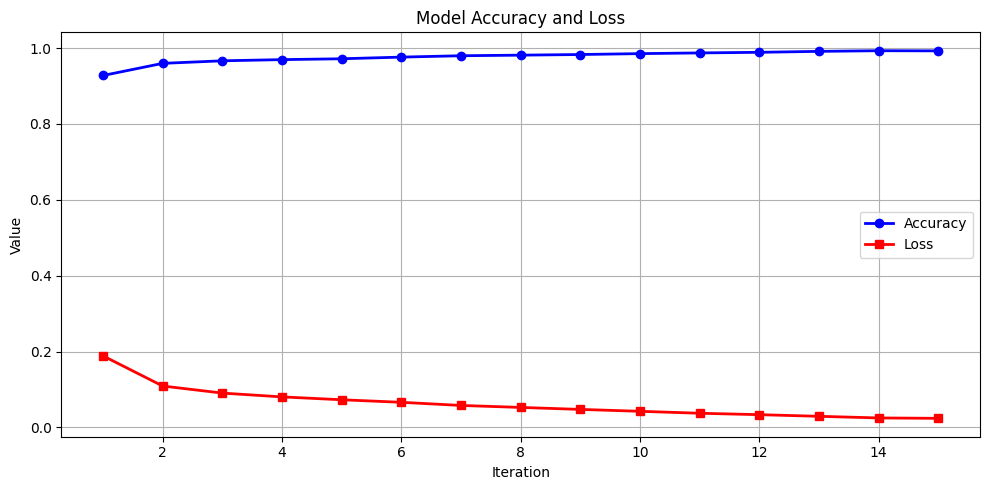

In [ ]:
iterations = range(1, len(Model_Xception.history['accuracy']) + 1)
accuracy = Model_Xception.history['accuracy']
loss = Model_Xception.history['loss']

plt.figure(figsize=(10, 5))
plt.plot(iterations, accuracy, 'b', label='Accuracy', linewidth=2, marker='o')
plt.plot(iterations, loss, 'r', label='Loss', linewidth=2, marker='s')
plt.title('Model Accuracy and Loss')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3) Check the performance of models with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

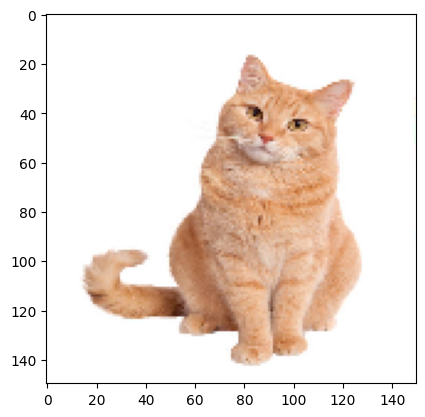

In [ ]:
cat = image.load_img('/content/drive/image_1.jpg', target_size=(150, 150))
plt.imshow(cat)

In [ ]:
cats = image.img_to_array(cat)
cats = np.expand_dims(cats, axis=0)
cats_feature = np.vstack([cats])

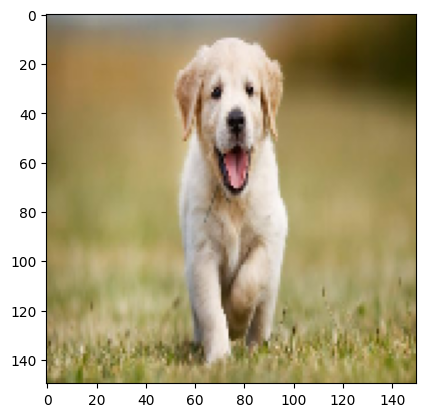

In [ ]:
dog = image.load_img('/content/drive/image_2.jpg', target_size=(150, 150))
plt.imshow(dog)

In [ ]:
dogs = image.img_to_array(dog)
dogs = np.expand_dims(dogs, axis=0)
dogs_feature = np.vstack([dogs])

In [ ]:
def predict_and_print(model, features, modelname, pet_type):
    pet_pred = model.predict(features, batch_size=batch_size)
    pet_label = "cats" if pet_pred < 0.5 else "dogs"
    print(f"Model {modelname}, predicted {pet_type} as a {pet_label}")

In [ ]:
predict_and_print(model, cats_feature, "Model with 3Conv layers", "cats")

1/1 [==============================] - 0s 304ms/step
Model Model with 3Conv layers, predicted cats as a cats


In [ ]:
predict_and_print(model_vgg16, cats_feature, "Model vgg16", "cats")

1/1 [==============================] - 1s 531ms/step
Model Model vgg16, predicted cats as a cats


In [ ]:
predict_and_print(model_resnet50, cats_feature, "Model ResNet50", "cats")

1/1 [==============================] - 1s 1s/step
Model Model ResNet50, predicted cats as a dogs


In [ ]:
predict_and_print(model_xception, cats_feature, "Model Xception", "cats")

1/1 [==============================] - 1s 1s/step
Model Model Xception, predicted cats as a dogs


In [ ]:
predict_and_print(model, dogs_feature, "Model with 3Conv layers", "dogs")

1/1 [==============================] - 0s 28ms/step
Model Model with 3Conv layers, predicted dogs as a dogs


In [ ]:
predict_and_print(model_vgg16, dogs_feature, "Model vgg16", "dogs")

1/1 [==============================] - 0s 19ms/step
Model Model vgg16, predicted dogs as a dogs


In [ ]:
predict_and_print(model_resnet50, dogs_feature, "Model ResNet50", "dogs")

1/1 [==============================] - 0s 25ms/step
Model Model ResNet50, predicted dogs as a dogs


In [ ]:
predict_and_print(model_xception, dogs_feature, "Model Xception", "dogs")

1/1 [==============================] - 0s 36ms/step
Model Model Xception, predicted dogs as a dogs


# Part 3

## Train the DL model with the highest possible accuracy on test data. You may experiment with any architecture and / or ensemble of models on your own choice (not limited to keras.io/api/applications).

I decided to train the Xception model because in testing models on animal prediction, this model misclassified the cat. Also, this model showed the best accuracy on the test data, so I have a high chance of getting good accuracy.
I decided to train the model "traditionally" first and then try adding early stopping, lr schedule and checkpoint.

After my two attempts to improve the model I will write the results and conclusion.

## Attempt №1

In [ ]:
xception_net_task3 = Xception(weights='imagenet',
                        include_top=False,
                        input_shape=(224, 224, 3)) # i changed the shape
xception_net_task3.trainable = False
xception_net_task3.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]

In [ ]:
model_xception_task3 = Sequential()
model_xception_task3.add(xception_net_task3)

model_xception_task3.add(Flatten())
model_xception_task3.add(Dense(2048))
model_xception_task3.add(BatchNormalization())
model_xception_task3.add(LeakyReLU(alpha=0.1))
model_xception_task3.add(Dropout(0.5))

model_xception_task3.add(Dense(1024))
model_xception_task3.add(BatchNormalization())
model_xception_task3.add(LeakyReLU(alpha=0.1))
model_xception_task3.add(Dropout(0.5))

model_xception_task3.add(Dense(512))
model_xception_task3.add(BatchNormalization())
model_xception_task3.add(LeakyReLU(alpha=0.1))
model_xception_task3.add(Dropout(0.5))

model_xception_task3.add(Dense(256))
model_xception_task3.add(BatchNormalization())
model_xception_task3.add(LeakyReLU(alpha=0.1))
model_xception_task3.add(Dropout(0.5))

model_xception_task3.add(Dense(128))
model_xception_task3.add(BatchNormalization())
model_xception_task3.add(LeakyReLU(alpha=0.1))
model_xception_task3.add(Dropout(0.5))

model_xception_task3.add(Dense(1, activation='sigmoid'))

model_xception_task3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 2048)              205522944 
                                                                 
 batch_normalization_4 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2048)              0         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                        

In [ ]:
model_xception_task3.compile(loss='binary_crossentropy',
                       optimizer=Adam(learning_rate=1e-5),
                       metrics=['accuracy'])

In [ ]:
Model_Xception_task3 = model_xception_task3.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/50
312/312 [==============================] - 66s 212ms/step - loss: 0.0070 - accuracy: 0.9993 - val_loss: 0.0567 - val_accuracy: 0.9840
Epoch 2/50
312/312 [==============================] - 66s 212ms/step - loss: 0.0064 - accuracy: 0.9994 - val_loss: 0.0529 - val_accuracy: 0.9868
Epoch 3/50
312/312 [==============================] - 67s 214ms/step - loss: 0.0063 - accuracy: 0.9991 - val_loss: 0.0564 - val_accuracy: 0.9864
Epoch 4/50
312/312 [==============================] - 67s 214ms/step - loss: 0.0052 - accuracy: 0.9994 - val_loss: 0.0585 - val_accuracy: 0.9844
Epoch 5/50
312/312 [==============================] - 67s 215ms/step - loss: 0.0047 - accuracy: 0.9996 - val_loss: 0.0563 - val_accuracy: 0.9856
Epoch 6/50
312/312 [==============================] - 67s 214ms/step - loss: 0.0040 - accuracy: 0.9996 - val_loss: 0.0574 - val_accuracy: 0.9856
Epoch 7/50
312/312 [==============================] - 67s 214ms/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0576 - val_ac

### Accuracy on the test data (attempt 1)

In [ ]:
scores_xception_task3 = model_xception_task3.evaluate_generator(test_generator, nb_test_samples // batch_size)
print("Accuracy on test data (xception): %.5f%%" % (scores_xception_task3[1] * 100))

Accuracy on test data (xception): 98.75801%


### Predictions (attempt 1)

In [ ]:
predict_and_print(model_xception_task3, cats_feature, "Model Xception", "cats")

1/1 [==============================] - 1s 750ms/step
Model Model Xception, predicted cats as a cats


In [ ]:
predict_and_print(model_xception_task3, dogs_feature, "Model Xception", "dogs")

1/1 [==============================] - 0s 25ms/step
Model Model Xception, predicted dogs as a dogs


## Attempt №2

In [ ]:
from keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint

In [ ]:
xception_net_task3_1 = Xception(weights='imagenet',
                        include_top=False,
                        input_shape=(224, 224, 3)) # i changed the shape
xception_net_task3_1.trainable = False
xception_net_task3_1.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_4[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]

In [ ]:
model_xception_task3_1 = Sequential()
model_xception_task3_1.add(xception_net_task3_1)

model_xception_task3_1.add(Flatten())
model_xception_task3_1.add(Dense(2048))
model_xception_task3_1.add(BatchNormalization())
model_xception_task3_1.add(LeakyReLU(alpha=0.1))
model_xception_task3_1.add(Dropout(0.5))

model_xception_task3_1.add(Dense(1024))
model_xception_task3_1.add(BatchNormalization())
model_xception_task3_1.add(LeakyReLU(alpha=0.1))
model_xception_task3_1.add(Dropout(0.5))

model_xception_task3_1.add(Dense(512))
model_xception_task3_1.add(BatchNormalization())
model_xception_task3_1.add(LeakyReLU(alpha=0.1))
model_xception_task3_1.add(Dropout(0.5))

model_xception_task3_1.add(Dense(256))
model_xception_task3_1.add(BatchNormalization())
model_xception_task3_1.add(LeakyReLU(alpha=0.1))
model_xception_task3_1.add(Dropout(0.5))

model_xception_task3_1.add(Dense(128))
model_xception_task3_1.add(BatchNormalization())
model_xception_task3_1.add(LeakyReLU(alpha=0.1))
model_xception_task3_1.add(Dropout(0.5))

model_xception_task3_1.add(Dense(1, activation='sigmoid'))

model_xception_task3_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_4 (Flatten)         (None, 100352)            0         
                                                                 
 dense_10 (Dense)            (None, 2048)              205522944 
                                                                 
 batch_normalization_11 (Ba  (None, 2048)              8192      
 tchNormalization)                                               
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 2048)              0         
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                      

In [ ]:
model_xception_task3_1.compile(loss='binary_crossentropy',
                             optimizer=Adam(learning_rate=1e-5),
                             metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy', patience=20, mode='max', verbose=1)

In [ ]:
def lr_schedule(epoch):
    lr = 1e-5 * np.exp(-0.1 * epoch)
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

In [ ]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='accuracy', save_best_only=True, mode='max', verbose=1)

In [ ]:
from keras import backend as K
K.clear_session()

In [ ]:
Model_Xception_task3_1 = model_xception_task3_1.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=50,
    validation_data=val_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[checkpoint, early_stopping, lr_scheduler])

Epoch 1/50
312/312 [==============================] - ETA: 0s - loss: 0.3570 - accuracy: 0.8522
Epoch 1: accuracy improved from -inf to 0.85218, saving model to best_model.h5
312/312 [==============================] - 182s 583ms/step - loss: 0.3570 - accuracy: 0.8522 - val_loss: 0.1298 - val_accuracy: 0.9848 - lr: 1.0000e-05
Epoch 2/50
312/312 [==============================] - ETA: 0s - loss: 0.1771 - accuracy: 0.9572
Epoch 2: accuracy improved from 0.85218 to 0.95716, saving model to best_model.h5
312/312 [==============================] - 80s 257ms/step - loss: 0.1771 - accuracy: 0.9572 - val_loss: 0.0880 - val_accuracy: 0.9856 - lr: 9.0484e-06
Epoch 3/50
312/312 [==============================] - ETA: 0s - loss: 0.1238 - accuracy: 0.9750
Epoch 3: accuracy improved from 0.95716 to 0.97497, saving model to best_model.h5
312/312 [==============================] - 77s 244ms/step - loss: 0.1238 - accuracy: 0.9750 - val_loss: 0.0696 - val_accuracy: 0.9877 - lr: 8.1873e-06
Epoch 4/50
312/

### Predictions (attempt 2)

In [ ]:
predict_and_print(model_xception_task3_1, cats_feature, "Model Xception", "cats")

1/1 [==============================] - 13s 13s/step
Model Model Xception, predicted cats as a cats


In [ ]:
predict_and_print(model_xception_task3_1, dogs_feature, "Model Xception", "dogs")

1/1 [==============================] - 0s 101ms/step
Model Model Xception, predicted dogs as a cats


### Accuracy on the test data (attempt 2)

In [ ]:
from keras.models import load_model
import tensorflow as tf

In [ ]:
with tf.device('/device:gpu:0'):
    best_model = load_model('best_model.h5')

    scores_best_model = best_model.evaluate_generator(test_generator, nb_test_samples // batch_size)
    print("Accuracy on test data (best_model): %.5f%%" % (scores_best_model[1] * 100))

Accuracy on test data (best_model): 98.55769%


# Conclusion

In this task, we addressed the binary classification problem using various deep learning techniques.

In **Part 1**, we constructed and trained a Convolutional Neural Network (CNN) with three convolutional layers, achieving a satisfactory level of accuracy on the test data. The evaluation of the model's performance was supplemented by the graphical representation of the loss and accuracy trends over the epochs.

Moving to **Part 2**, we delved into Transfer Learning by leveraging pre-trained VGG16, ResNet50, and Xception models from the Keras applications. The accuracy evaluation on the test data for both VGG16 and Xception models demonstrated their effectiveness in handling the classification task. We also visualized the loss and accuracy trends, offering insights into the convergence and performance of the transfer learning models.

|Model|Accuracy on test data|
|:---:|:---:|
|3Conv (10 epochs) | 83.81%|
|3Conv (15 epochs) | 84.42%|
|3Conv (20 epochs) | 84.78%|
|VGG  | 90.30%|
|RN50 | 71.39%|
|Xception | 95.83%|

To verify the practical applicability of the models, we tested their performance on a user image of a cat and a dog, successfully implementing the best algorithm inference function. It is worth noting that all models coped with dog predictions, but only two models - Model with 3Conv layers and VVG16 - coped with the correct prediction of the cat image.

In **part 3** the Xception model was trained, I tried two attempts to train the model. In the end, the "traditional" way of training the model performed better than using such tricks as early stopping, lr scheduler and checkpoint, and also the trained model predicted the dog's photo incorrectly in the second attempt.

|Model|Accuracy on test data|
|:---:|:---:|
|Xception (attempt 1) | 98.75801%|
|Xception (attempt 2) | 98.55769%|


**In part 3, the best accuracy result of the Xception model (attempt 1) is achieved on the test sample with a value of 98.75801%**